In [1]:
import pandas as pd

In [5]:
data = pd.read_csv('data/driving_log3.csv')
data.columns = ['center','left','right','steering','throttle','break','speed']

In [6]:
data2 = data.query('steering != 0')

In [7]:
print (data.shape)
print (data2.shape)

(3487, 7)
(1848, 7)


In [19]:
data2.to_csv('data/driving_log_2.csv', header=False, index=False)

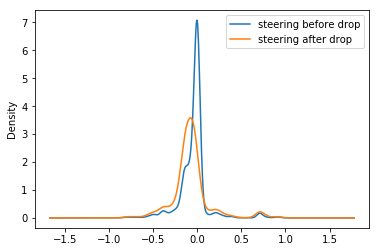

In [16]:
plot_data = pd.concat([data[['steering']].rename(columns={'steering':'steering before drop'}),
                       data2[['steering']].rename(columns={'steering':'steering after drop'})], axis=1)
plot_data.plot(kind='kde')

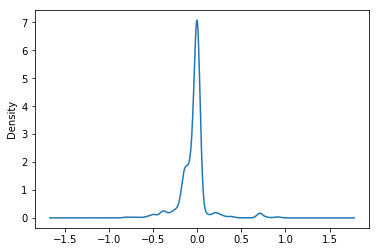

In [8]:
%matplotlib inline
data.steering.plot(kind='kde');

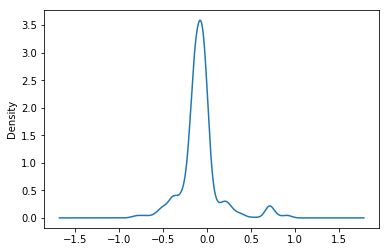

In [11]:
data2.steering.plot(kind='kde')

In [7]:
data.head()

,center,left,right,steering,throttle,break,speed
0,IMG/center_2017_07_30_23_26_50_660.jpg,IMG/left_2017_07_30_23_26_50_660.jpg,IMG/right_2017_07_30_23_26_50_660.jpg,-0.400086,0.0,0,0.000003
1,IMG/center_2017_07_30_23_26_50_744.jpg,IMG/left_2017_07_30_23_26_50_744.jpg,IMG/right_2017_07_30_23_26_50_744.jpg,-0.397023,0.0,0,0.000004
2,IMG/center_2017_07_30_23_26_50_827.jpg,IMG/left_2017_07_30_23_26_50_827.jpg,IMG/right_2017_07_30_23_26_50_827.jpg,-0.397023,0.0,0,0.000004
3,IMG/center_2017_07_30_23_26_50_910.jpg,IMG/left_2017_07_30_23_26_50_910.jpg,IMG/right_2017_07_30_23_26_50_910.jpg,-0.397023,0.0,0,0.000005
4,IMG/center_2017_07_30_23_26_50_977.jpg,IMG/left_2017_07_30_23_26_50_977.jpg,IMG/right_2017_07_30_23_26_50_977.jpg,-0.397023,0.0,0,0.000006


Merge datasets

In [31]:
def fix_paths(data):
    # coding: utf-8
    for c in data.columns:
        try:
            data[c] = data[c].apply(lambda x: x.replace('/home/daniel/deep-learning/sdc/Car-Behavioral-Cloning/data2/', ''))
        except:
            pass
    return data

In [38]:
# load other dataset
data_inv = pd.read_csv('data2/driving_log.csv')
data_inv.columns = ['center','left','right','steering','throttle','break','speed']

In [39]:
data_inv = fix_paths(data_inv)

In [9]:
data_inv.steering.plot(kind='kde')

NameError: name 'data_inv' is not defined

In [42]:
all_data = pd.concat([data, data_inv])

In [50]:
all_data = all_data.query('steering != 0')

In [47]:
all_data.to_csv('data/driving_log_2.csv', header=False, index=False)